**Exploring Data**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
•
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
•
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
•
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
•
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
​

In [1]:
# Assigning Their Respective Directories
train_dir = "/kaggle/input/vegetable-image-dataset/Vegetable Images/train"
test_dir = "/kaggle/input/vegetable-image-dataset/Vegetable Images/test"
val_dir = "/kaggle/input/vegetable-image-dataset/Vegetable Images/validation"

In [2]:
# Walking through the training directory to get the list of number of files 
import os
for dirpath,dirnames,filenames in os.walk(train_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 15 directories and 0 images in '/kaggle/input/vegetable-image-dataset/Vegetable Images/train'.
There are 0 directories and 1000 images in '/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Broccoli'.
There are 0 directories and 1000 images in '/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Capsicum'.
There are 0 directories and 1000 images in '/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Bottle_Gourd'.
There are 0 directories and 1000 images in '/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Radish'.
There are 0 directories and 1000 images in '/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Tomato'.
There are 0 directories and 1000 images in '/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Brinjal'.
There are 0 directories and 1000 images in '/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Pumpkin'.
There are 0 directories and 1000 images in '/kaggle/input/vegetable-image-dataset/Veg

In [3]:
#Let's Get the all Class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Bean' 'Bitter_Gourd' 'Bottle_Gourd' 'Brinjal' 'Broccoli' 'Cabbage'
 'Capsicum' 'Carrot' 'Cauliflower' 'Cucumber' 'Papaya' 'Potato' 'Pumpkin'
 'Radish' 'Tomato']


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras import layers,mixed_precision
from shutil import copyfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Image shape: (224, 224, 3)


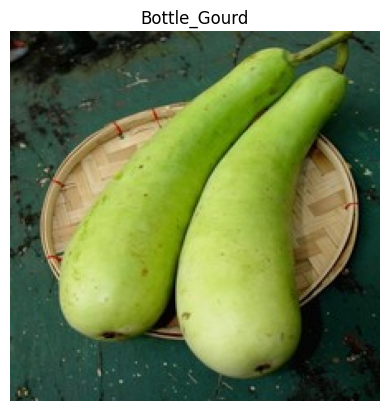

In [6]:
import random
img = view_random_image(target_dir=train_dir+"/",
                        target_class=random.choice(class_names))

In [7]:
# Let divide this data into batches using the imagedatagenerator for train,test,validation data's
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Rescale
#Training Data
train_datagen=ImageDataGenerator(rescale=1/255.)
#Testing Data
test_datagen=ImageDataGenerator(rescale=1/255.)
#Validation Data
valid_datagen=ImageDataGenerator(rescale=1/255.) 

##Loading the data from directories to turn into the batches 

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

validation_data = valid_datagen.flow_from_directory(val_dir,
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode="categorical")

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [8]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [9]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(15, activation="softmax")
])

model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [10]:
#Let's fit our first model
history = model.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data))

Epoch 1/5
469/469 [==============================] - 151s 303ms/step - loss: 1.1716 - accuracy: 0.6353 - val_loss: 0.7108 - val_accuracy: 0.7827
Epoch 2/5
469/469 [==============================] - 35s 75ms/step - loss: 0.4851 - accuracy: 0.8519 - val_loss: 0.5139 - val_accuracy: 0.8450
Epoch 3/5
469/469 [==============================] - 34s 73ms/step - loss: 0.2692 - accuracy: 0.9205 - val_loss: 0.4189 - val_accuracy: 0.8697
Epoch 4/5
469/469 [==============================] - 36s 77ms/step - loss: 0.1530 - accuracy: 0.9567 - val_loss: 0.4356 - val_accuracy: 0.8727
Epoch 5/5
469/469 [==============================] - 34s 73ms/step - loss: 0.0918 - accuracy: 0.9745 - val_loss: 0.6336 - val_accuracy: 0.8350


**Predicting Custom Images**


In [11]:
#predicting custom image
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, colour_channels).
  colour_channels are decoded to Red,Green,Blue i.e; colour_channels=3
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [12]:
# Configuring pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 163ms/step


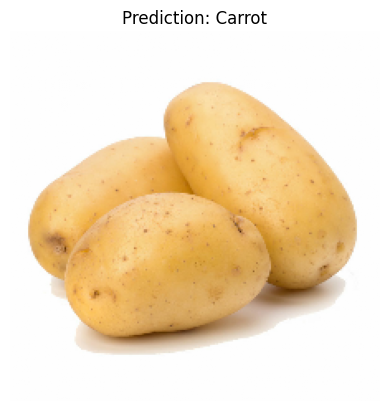

In [13]:
#Let's predict some custom downloaded images from google
pred_and_plot(model=model,
              filename="/kaggle/input/custom/potato.jpg",
              class_names=class_names)

1/1 [==============================] - 0s 20ms/step


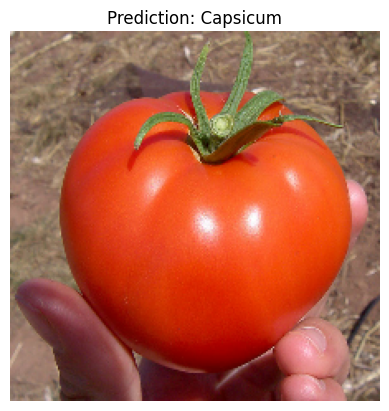

In [14]:
pred_and_plot(model=model,
              filename="/kaggle/input/custom2/tomato2.jpg",
              class_names=class_names)

1/1 [==============================] - 0s 20ms/step


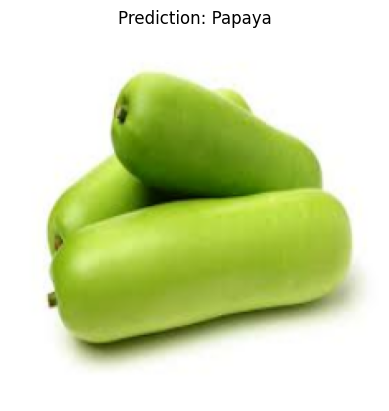

In [15]:
pred_and_plot(model=model,
              filename="/kaggle/input/custom/bottle_gourd.jpeg",
              class_names=class_names)

# **Improving Our Model Through Transfer Learning**

In [16]:
##Whereas our model is giving wrong predictions we will train the model using transfer learning
inception_url="https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5"
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [17]:
#For the better version of classifying images the shape of image should be in (224,224,3)
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32
IMAGE_SHAPE + (3,)

(224, 224, 3)

In [18]:
def create_model(model_url, num_classes=15):
  """
  Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
      should be equal to number of target classes, default 10.
  Freeze Layers:
    This is because you don't want the weights in those layers to be re-initialized. 
    If they are, then you will lose all the learning that 
    has already taken place. This will be no different from training the model from scratch."
  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor
    layer and Dense output layer with num_classes output neurons.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the already learned patterns
                                           name="feature_extraction_lyaer",
                                           input_shape=IMAGE_SHAPE+(3,)) 

  # Create our own model
  model_1 = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])
    
  return model_1  

In [19]:
#Inception model
inception_model = create_model(inception_url,
                            num_classes=15)

In [20]:
inception_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [21]:
# Let's fit our Inception_V3 model to the data (10 percent of 10 classes)
inception_history = inception_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=validation_data,
                                  validation_steps=len(validation_data),
                                  )

Epoch 1/5
469/469 [==============================] - 50s 91ms/step - loss: 0.1919 - accuracy: 0.9503 - val_loss: 0.0534 - val_accuracy: 0.9860
Epoch 2/5
469/469 [==============================] - 42s 90ms/step - loss: 0.0319 - accuracy: 0.9941 - val_loss: 0.0273 - val_accuracy: 0.9947
Epoch 3/5
469/469 [==============================] - 42s 89ms/step - loss: 0.0163 - accuracy: 0.9976 - val_loss: 0.0209 - val_accuracy: 0.9950
Epoch 4/5
469/469 [==============================] - 40s 85ms/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 0.0196 - val_accuracy: 0.9947
Epoch 5/5
469/469 [==============================] - 40s 86ms/step - loss: 0.0063 - accuracy: 0.9995 - val_loss: 0.0161 - val_accuracy: 0.9963


1/1 [==============================] - 2s 2s/step


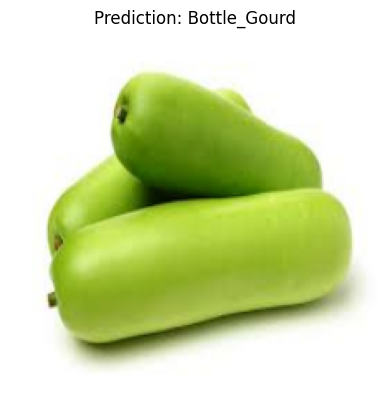

In [22]:
pred_and_plot(model=inception_model,
              filename="/kaggle/input/custom/bottle_gourd.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 33ms/step


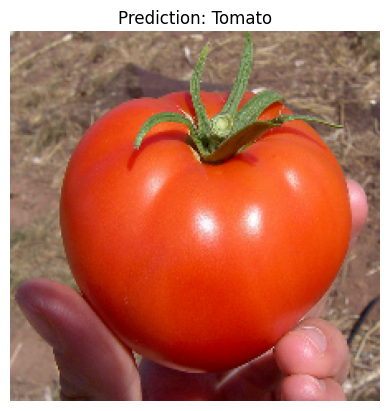

In [24]:
pred_and_plot(model=inception_model,
              filename="/kaggle/input/custom2/tomato2.jpg",
              class_names=class_names)

1/1 [==============================] - 0s 27ms/step


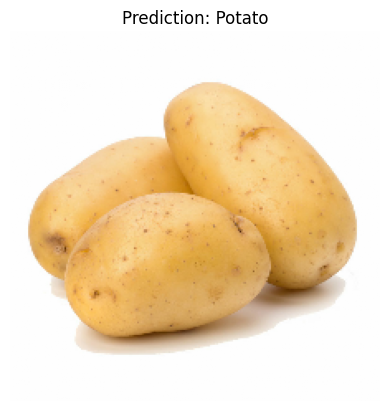

In [25]:
pred_and_plot(model=inception_model,
              filename="/kaggle/input/custom/potato.jpg",
              class_names=class_names)

**Let's Create another Model to improve accuracy**

In [26]:
##Here is our Super Hero Of the model "Resnet50"
resnet50_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
resnet_model = create_model(resnet50_url,
                            num_classes=15)

In [27]:
# Compile our Resnet model
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [28]:
# let's fit our Resnet model
resnet_history = resnet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=validation_data,
                                  validation_steps=len(validation_data),
                                  )

Epoch 1/5
469/469 [==============================] - 65s 127ms/step - loss: 0.1525 - accuracy: 0.9648 - val_loss: 0.0233 - val_accuracy: 0.9980
Epoch 2/5
469/469 [==============================] - 50s 106ms/step - loss: 0.0140 - accuracy: 0.9983 - val_loss: 0.0136 - val_accuracy: 0.9970
Epoch 3/5
469/469 [==============================] - 50s 107ms/step - loss: 0.0062 - accuracy: 0.9997 - val_loss: 0.0101 - val_accuracy: 0.9973
Epoch 4/5
469/469 [==============================] - 50s 106ms/step - loss: 0.0035 - accuracy: 0.9998 - val_loss: 0.0080 - val_accuracy: 0.9977
Epoch 5/5
469/469 [==============================] - 50s 106ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.0069 - val_accuracy: 0.9983


# **Evaluating the loss and accuracy curves**

In [29]:
# Let's create a function to plot our loss curves for checking the accuracy and efficiency of the model's
import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow History object.

  Returns:
    Plots of training/validation loss and accuracy metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();


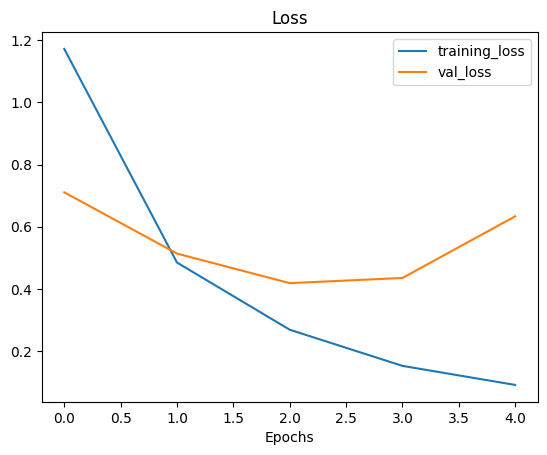

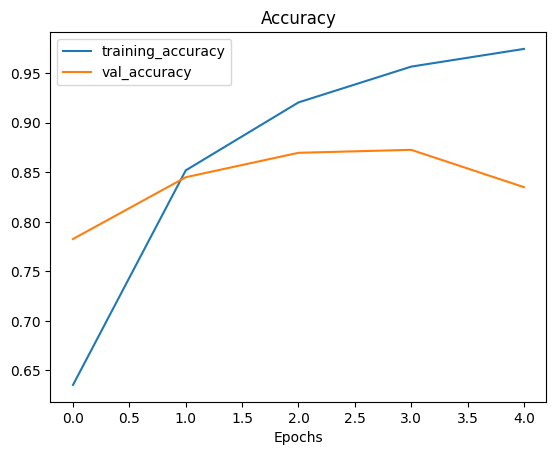

In [30]:
plot_loss_curves(history)

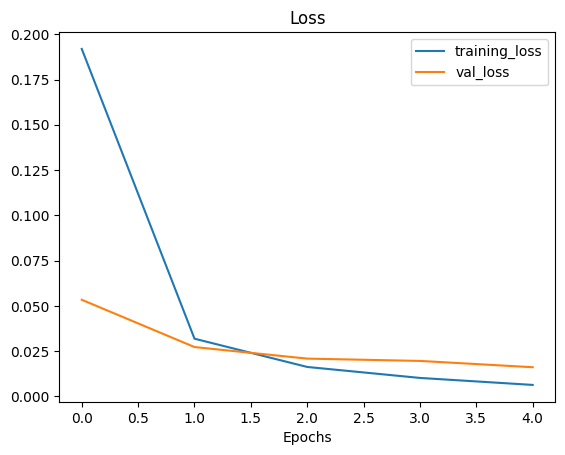

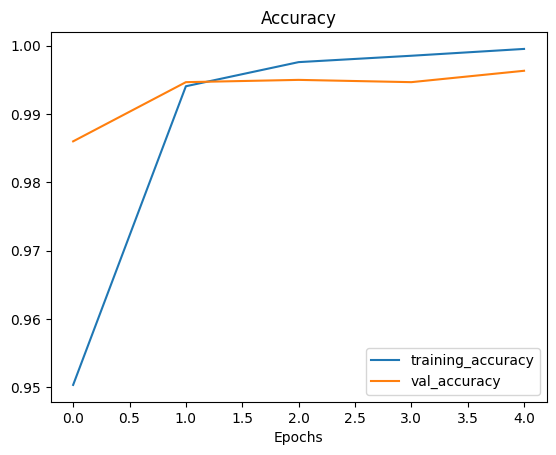

In [31]:
plot_loss_curves(inception_history)

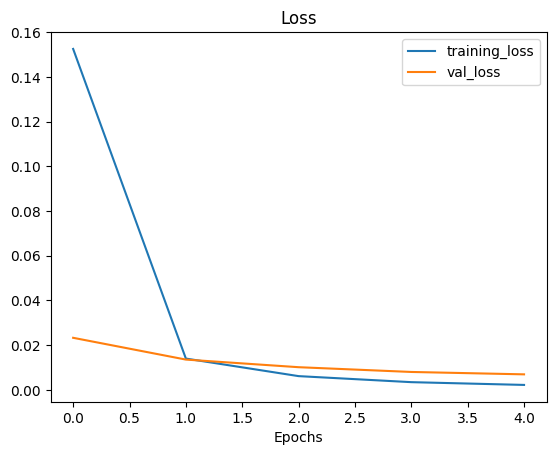

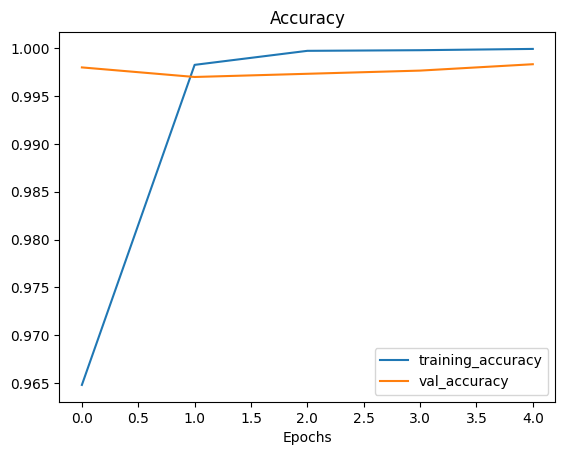

In [32]:
plot_loss_curves(resnet_history)